<a href="https://colab.research.google.com/github/nonwiz0/shapeidentifier/blob/main/shape_identifier_simplified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shape Identifier
Develop a neural network to recognize basic geometry shapes like triangles, rectangles, pentagons, hexagons base on user input.

## What we did:
1. We generate image using 2DGeometryShapesGenerator (We customized it a little bit to generate in a certain color we want)
2. We custom convert it to Dataset, but first we upload to Google Drive
3. We convert the dataset into Numpyarray for future uses, so we don't have to rely on the image on Google Drive anymore
4. We flatten the array shifting its core from RGB reliance to Grayscale
5. To 

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow_datasets as tfds
import os
import cv2
import random


IMG_SIZE = 200
CATEGORIES = ["Circle", "Heptagon", "Hexagon", "Nonagon", "Octagon", "Pentagon", "Square", "Star", "Triangle"]

def showFigure(arr, index, label):
  print("Actual Shape: Category", label[index], CATEGORIES[label[index]])
  plt.figure()
  img = cv2.resize(arr[index], (IMG_SIZE, IMG_SIZE) )
  plt.imshow(img, cmap='gray')
  plt.show()

In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
training_data = np.load('/content/drive/MyDrive/AI_Dataset/training_data.npy')
testing_data = np.load("/content/drive/MyDrive/AI_Dataset/testing_data.npy")
np.load = np_load_old


random.shuffle(training_data)
random.shuffle(testing_data)
print("Everyday im shuffling...")

Everyday im shuffling...


In [4]:
training_data[0][1]

2

In [6]:
X_TRAIN = []
X_TEST = []
y_train = []
y_test = []

for features, label in training_data:
  X_TRAIN.append(features)
  y_train.append(label)
  
for features, label in testing_data:
  X_TEST.append(features)
  y_test.append(label)

X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE)
X_TEST = np.array(X_TEST).reshape(-1, IMG_SIZE, IMG_SIZE)

# Data Preprocessing
X_TRAIN = X_TRAIN / 255
X_TEST = X_TEST / 255
X_TRAIN = np.floor(X_TRAIN)
X_TEST = np.floor(X_TEST)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
X_TRAIN[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)), # Input
    keras.layers.Dense(128, activation='tanh'), # Hidden Layer #1
    keras.layers.Dense(81, activation='relu'), # Hidden Layer #2
    keras.layers.Dense(len(CATEGORIES), activation='sigmoid') # Output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))
model.add(keras.layers.Dense(units=126, activation='relu'))
model.add(keras.layers.Dense(units=99, activation='relu'))
model.add(keras.layers.Dense(units=81, activation='relu'))
model.add(keras.layers.Dense(units=len(CATEGORIES), activation='softmax'))

model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy", 
    metrics=['accuracy'])

In [12]:
model.fit(X_TRAIN, y_train, epochs=10)

Epoch 1/10
141/141 [==============================] - 5s 35ms/step - loss: 0.2000 - accuracy: 0.9364
Epoch 2/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1891 - accuracy: 0.9376
Epoch 3/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1622 - accuracy: 0.9442
Epoch 4/10
141/141 [==============================] - 5s 35ms/step - loss: 0.2130 - accuracy: 0.9333
Epoch 5/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1833 - accuracy: 0.9409
Epoch 6/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1415 - accuracy: 0.9538
Epoch 7/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1652 - accuracy: 0.9533
Epoch 8/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1702 - accuracy: 0.9509
Epoch 9/10
141/141 [==============================] - 5s 35ms/step - loss: 0.2145 - accuracy: 0.9398
Epoch 10/10
141/141 [==============================] - 5s 35ms/step - loss: 0.1349 - accura

Actual Shape: Category 2 Hexagon


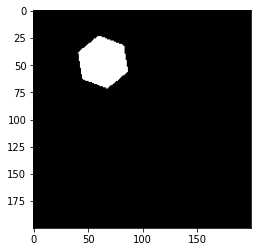

In [60]:
showFigure(X_TRAIN, 1, y_train)

141/141 [==============================] - 2s 12ms/step - loss: 0.0791 - accuracy: 0.9793
Length of prediction 4500
Predict Shape: Category 1 Heptagon
Actual Shape: Category 1 Heptagon


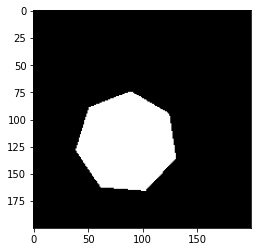

In [13]:
dataset, d_label = X_TRAIN, y_train
model.evaluate(dataset, d_label)
y_predicted = model.predict(dataset)
predict_value = np.argmax(y_predicted, axis=1)

index = 199
print("Length of prediction", len(predict_value))
print("Predict Shape: Category", predict_value[index], CATEGORIES[predict_value[index]])
showFigure(dataset, index, d_label)





# Reference

* [Neural Network with Handwritten](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb)
*   [Generating Image](https://github.com/elkorchi/2DGeometricShapesGenerator)
*   [Creating Dataset - Custom](https://www.youtube.com/watch?v=j-3vuBynnOE)
* [Save Numpy Array](https://colab.research.google.com/github/geekmj/python-tutorials/blob/master/numpy-basics/save-array-to-file.ipynb#scrollTo=rw-4iKeOgkMm)



